**[LeetCode Link](https://leetcode-cn.com/problems/unique-binary-search-trees/solution/bu-tong-de-er-cha-sou-suo-shu-by-leetcode/)**

## 动态规划
### 算法
问题是计算不同二叉搜索树的个数。为此，我们可以定义两个函数：
* G(n): 长度为n的序列的不同二叉搜索树个数。
* F(i, n): 以i为根的不同二叉搜索树个数(1≤i≤n)。

&emsp;&emsp;&emsp;&emsp;$G(n)=\sum_{i=1}^{n} F(i, n)$

特别的，对于边界情况，当序列长度为 1 （只有根）或为 0 （空树）时，只有一种情况。亦即：
&emsp;&emsp;&emsp;&emsp;$G(0)=1,G(1)=1$

给定序列 1 ... n，我们选出数字 i 作为根，则对于根 i 的不同二叉搜索树数量 F(i, n)F(i,n)，是左右子树个数的笛卡尔积，如下图所示:
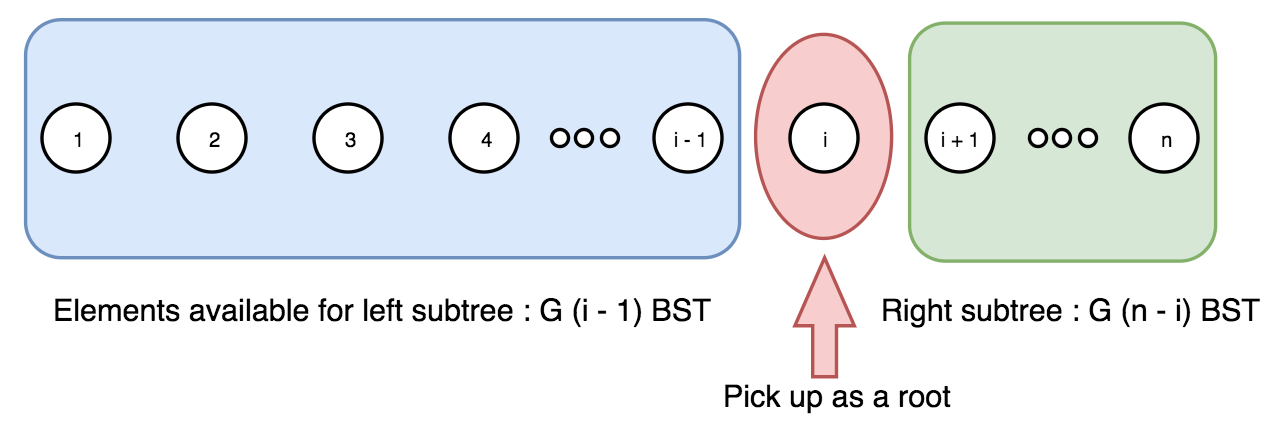
巧妙之处在于，我们可以将 [1,2] 构建不同左子树的数量表示为 G(2), 从 [4, 5, 6, 7] 构建不同右子树的数量表示为 G(4)。这是由于 G(n) 和序列的内容无关，只和序列的长度有关。于是，F(3,7)=G(2)⋅G(4)。概括而言，我们可以得到以下公式：

&emsp;&emsp;&emsp;&emsp;$F(i, n)=G(i-1) \cdot G(n-i)$

结合可得到如下公式：

&emsp;&emsp;&emsp;&emsp;$G(n)=\sum_{i=1}^{n} G(i-1) \cdot G(n-i)$

### 复杂度分析
* 时间复杂度 : 上述算法的主要计算开销在于包含 G[i] 的语句。因此，时间复杂度为这些语句的执行次数，也就是 $\sum_{i=2}^{n} i=\frac{(2+n)(n-1)}{2}$。因此，时间复杂度为 O(N^2)。
* 空间复杂度 : 上述算法的空间复杂度主要是存储所有的中间结果，因此为 O(N)。

In [ ]:
class Solution:
    def numTrees(self, n):
        """
        :type n: int
        :rtype: int
        """
        G = [0]*(n+1)
        G[0], G[1] = 1, 1

        for i in range(2, n+1):
            for j in range(1, i+1):
                G[i] += G[j-1] * G[i-j]

        return G[n]

## 数学演绎法
事实上 G(n)函数的值被称为卡塔兰数Cn。卡塔兰数更便于计算的定义如下:

&emsp;&emsp;&emsp;&emsp;$C_{0}=1, \quad C_{n+1}=\frac{2(2 n+1)}{n+2} C_{n}$

### 复杂度分析
* 时间复杂度 : O(N)，只有一层循环。
* 空间复杂度 : O(1)，只需要一个变量来存储中间与最终结果。

In [ ]:
class Solution(object):
    def numTrees(self, n):
        """
        :type n: int
        :rtype: int
        """
        C = 1
        for i in range(0, n):
            C = C * 2*(2*i+1)/(i+2)
        return int(C)